## Сборный проект. Выявление определяющих успешность игры закономерностей.

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Краткий план работ
Шаг 1. Откроем файл с данными и изучим общую информацию  
Шаг 2. Подготовим данные  
Шаг 3. Проведем исследовательский анализ данных  
Шаг 4. Составим портрет пользователя каждого региона  
Шаг 5. Проверим гипотезы  
Шаг 6. Оформим общий вывод  

### Шаг 1.
Откроем файл с данными и изучим общую информацию

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data1 = pd.read_csv('/datasets/games.csv') # читаем файл

#### Описание данных
`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы долларов)  
`EU_sales` — продажи в Европе (миллионы долларов)  
`JP_sales` — продажи в Японии (миллионы долларов)  
`Other_sales` — продажи в других странах (миллионы долларов)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [55]:
data1.head(10) # посмотрим что есть в данных

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [56]:
data1.info() # смотрим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [57]:
data1['Critic_Score'].unique() # смотрим, есть ли оценки с десятыми после запятой

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [58]:
data1['User_Score'].unique() # смотрим какие есть оценки

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

`tbd` - скорее всего аббревиатура к фразе "будет сделано" или "будет решено". Посмотрим в каких случаях стоит это значение

In [59]:
data1[data1['User_Score'] == 'tbd'] 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Судя по всему значение `tbd` стоит там, где нет продаж (хотя бы в одной и стран) - значит оценка пока не полная и ее пока не определили 

In [60]:
data1['Rating'].unique() # смотрим какие есть оценки

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Проверим дубли

In [61]:
data1.duplicated().sum()

0

Дублей нет

Проверим пропущенные значения

In [62]:
data1.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [63]:
data1.isnull().query('Name == True') # определим где пустые записи года/жанра

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,True,False,False,True,False,False,False,False,True,True,True
14244,True,False,False,True,False,False,False,False,True,True,True


In [64]:
data1.iloc[[659, 14244]] # посмотрим на них явно

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две строки где нет ни названия ни жанра

В таблице есть:  
* пропущенные значения - `Year_of_Release`, `Name`, `Critic_Score`, `User_Score`, `Rating`, `Genre`
* некорректные типы данных - `User_Score`, `Critic_Score`, `Year_of_Release`

в следущем шаге приведем данные в порядок

### Шаг 2. Подготовим данные
Заменим названия столбцов (приведем к нижнему регистру) 

In [65]:
data1.columns = data1.columns.str.lower()

In [66]:
data1.head() # проверим как сработала замена

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия столбцов успешно заменены на нижний регистр

Обработаем пропуски при необходимости  
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
Опишите причины, которые могли привести к пропускам;

Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

Пропущенные значения есть в следующих столбцах:
* `Name` - 2  - это значение удаляем, т.к. эти две строчки совпадают с `Genre = NaN` . А для подготовки ответа по определению критериев успешности жанр имеет ключевое значение (названий можно придумать какое угодно, а количство жанров ограничено) 
* `Year_of_Release` - 269 - восстановим года, где можно из названия игры. Остальные удалим, т.к. восстановить года выпуска нереально. Скорее всего причина пропусков - забыли или пропустили эти поля при подготовке данных . 
* `Genre`  - 2 удаляем - см. `Name`
* `Critic_Score` - 8578 - заменим на среднее по указанному жанру. Для исследования критериев успешности игры это вполне подойдет. Возможно данные пропущены по причине отсутсвия реальных оценок  
* `User_Score` - 6701 - значения `tbd` и `NaN` заменим на среднее по жанру. Возможно данные пропущены по причине отсутсвия реальных оценок   
* `Rating` - 6766 - заменим на самый часто встречающийся рейтинг по жанру. Возможно данные пропущены по причине отсутсвия реальных оценок
##### В целом я бы направил данные на доработку - слишком много пропусков

In [67]:
data1 = data1.drop([659, 14244]).reset_index(drop = True) # удалим 2 строки с пустыми записями Name & Genre + обновим индексы

In [68]:
data1.iloc[[659, 14244]] # проверим сработала ли замена

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Guitar Hero,PS2,2005.0,Misc,1.67,0.61,0.03,0.07,91.0,8.7,T
14244,Mashiro Iro Symphony: *mutsu-no-hana,PSP,2011.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что замена сработала

Проработаем пропущенные года

In [69]:
data1.query('year_of_release == "NaN"') # посмотрим какие записи без дат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [70]:
data1['extracted_year'] = data1['name'].str.extract(r'(19\d{2}|20\d{2})') # добавим столбец с результатом извлечения года из названия игры
data1.query('year_of_release == "NaN"')[['name','extracted_year']] # проверим как отработало

,name,extracted_year
183,Madden NFL 2004,2004
377,FIFA Soccer 2004,2004
456,LEGO Batman: The Videogame,NaN
475,wwe Smackdown vs. Raw 2006,2006
609,Space Invaders,NaN
...,...,...
16371,PDC World Championship Darts 2008,2008
16403,Freaky Flyers,NaN
16446,Inversion,NaN
16456,Hakuouki: Shinsengumi Kitan,NaN


In [71]:
data1.info() # посмотрим какой тип у нового столбца "extracted_years"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
extracted_year     867 non-null object
dtypes: float64(6), object(6)
memory usage: 1.5+ MB


In [72]:
data1['extracted_year'] = pd.to_numeric(data1['extracted_year'], errors='coerce') # переведем "extracted_years" в численные значения

In [73]:
data1.info() # посмотрим как сработала замена

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
extracted_year     867 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [74]:
data1.query('year_of_release == "NaN"') # посмотрим какие индексы у дат "year_of_release" чтобы в дальнейшем проверить как они заменились

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,extracted_year
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004.0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004.0
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006.0
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,2008.0
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,NaN
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,NaN
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [75]:
data1['year_of_release'] =  data1['year_of_release'].fillna(data1['extracted_year']) # заменяем NaN там где возможно значением из "extracted_years"
data1.iloc[[183, 377, 456, 475, 16371]] # проверим сработала ли замена

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,extracted_year
183,Madden NFL 2004,PS2,2004.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004.0
377,FIFA Soccer 2004,PS2,2004.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004.0
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,NaN
475,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006.0
16371,PDC World Championship Darts 2008,PSP,2008.0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,2008.0


Удалось заменить 17 значений "NaN" на год из 269. Теперь незаполненных строк 252

In [76]:
data1.isnull().sum()

name                   0
platform               0
year_of_release      252
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8576
user_score          6699
rating              6764
extracted_year     15846
dtype: int64

Видим, что замена сработала

Удалим оставшиеся значения года выпуска

In [77]:
#data1['year_of_release'] = 
data1.dropna(subset = ['year_of_release'], inplace = True)
data1.iloc[[456, 16403, 16446]] # проверим сработала ли замена

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,extracted_year
457,Animal Crossing: Happy Home Designer,3DS,2015.0,Simulation,0.51,1.02,1.40,0.12,66.0,6.9,E,NaN
16655,Dramatical Murder Re:code,PSV,2014.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16698,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN


Поменяем тип данныя в `year_of_release` на целочисленные

In [78]:
data1['year_of_release'] = data1['year_of_release'].astype('int')

In [79]:
data1 = data1.drop(['extracted_year'], axis=1) #удалим ставший ненужным столбец extracted_year

Для рейтинга ESRB найдем самые часто встречающиеся рейтинги по жанрам

In [80]:
data1.groupby('genre')['rating'].value_counts()

genre         rating
Action        T          670
              M          597
              E10+       468
              E          410
              AO           1
              EC           1
Adventure     E          159
              T          114
              M           98
              E10+        67
              EC           2
Fighting      T          357
              M           48
              E10+        19
              E            8
Misc          E          449
              T          228
              E10+       166
              M           13
              EC           5
              K-A          1
Platform      E          354
              E10+       141
              T           63
              M            3
Puzzle        E          284
              E10+        42
              T           10
Racing        E          577
              T          167
              E10+        95
              M           18
Role-Playing  T          415
              M       

Сделаем функцию которая будет присваивать самые частые рейтинги по жанрам. Добавим результат работы функции в отдельный столбец. Потом значением этого столбца заменим пропущенные значения

In [81]:
def genre_mean_rating(genre):
    if genre == 'Action':
        return 'T'
    if genre == 'Adventure':
        return 'E'
    if genre == 'Fighting':
        return 'T'
    if genre == 'Misc':
        return 'E'
    if genre == 'Platform':
        return 'E'
    if genre == 'Puzzle':
        return 'E'
    if genre == 'Racing':
        return 'E'
    if genre == 'Role-Playing':
        return 'T'
    if genre == 'Shooter':
        return 'M'
    if genre == 'Simulation':
        return 'E'
    if genre == 'Sports':
        return 'E'
    if genre == 'Strategy':
        return 'T'

data1['genre_mean_rating'] = data1['genre'].apply(genre_mean_rating) # добавим столбец

In [82]:
data1['rating'] = data1['rating'].fillna(data1['genre_mean_rating']) # заменим пропущенные знгачения самыми популярными по жанру
data1.isnull().sum() # проверим как сработала замена

name                    0
platform                0
year_of_release         0
genre                   0
na_sales                0
eu_sales                0
jp_sales                0
other_sales             0
critic_score         8466
user_score           6610
rating                  0
genre_mean_rating       0
dtype: int64

In [83]:
data1 = data1.drop(['genre_mean_rating'], axis=1) #удалим ставший ненужным столбец genre_mean_rating
data1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,M


Преобразуем данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  
Меняем следующие данные:  
* `critic_score` -  на `int` - все оценки пользователй целочисленные  
* `user_score` - на `float` - из  строковой в десятичное значение

In [84]:
data1['critic_score'] = pd.to_numeric(data1['critic_score'], errors='coerce')
data1['user_score'] = pd.to_numeric(data1['user_score'], errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16712
Data columns (total 11 columns):
name               16461 non-null object
platform           16461 non-null object
year_of_release    16461 non-null int64
genre              16461 non-null object
na_sales           16461 non-null float64
eu_sales           16461 non-null float64
jp_sales           16461 non-null float64
other_sales        16461 non-null float64
critic_score       7995 non-null float64
user_score         7473 non-null float64
rating             16461 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Создадим справочник средних значений `critic_score` по жанрам

In [85]:
genre_mean = data1.groupby('genre')['critic_score'].mean().reset_index().rename(columns=({"critic_score": "critic_score_mean"}))
genre_mean['critic_score_mean'] = np.ceil(genre_mean['critic_score_mean'])
genre_mean

,genre,critic_score_mean
0,Action,67.0
1,Adventure,66.0
2,Fighting,70.0
3,Misc,67.0
4,Platform,69.0
5,Puzzle,68.0
6,Racing,68.0
7,Role-Playing,73.0
8,Shooter,71.0
9,Simulation,69.0


Объединим справочник с основной таблицей

In [86]:
data1 = data1.merge(genre_mean, on = 'genre')
data1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_mean
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,73.0
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,73.0
2,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,73.0
3,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,73.0
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,73.0
5,Mario & Sonic at the Olympic Games,Wii,2007,Sports,2.57,3.86,0.66,0.91,NaN,NaN,E,73.0
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,73.0
7,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,NaN,E,73.0
8,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,NaN,NaN,E,73.0
9,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,73.0


Заменим пустые значения с столбце `critic_score` + поменяем на целочисленный тип

In [87]:
data1['critic_score'] = data1['critic_score'].fillna(data1['critic_score_mean']).astype('int')
data1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_mean
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,73.0
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,73.0
2,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,73.0
3,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E,73.0
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,73.0
5,Mario & Sonic at the Olympic Games,Wii,2007,Sports,2.57,3.86,0.66,0.91,73,NaN,E,73.0
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,73.0
7,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,73,NaN,E,73.0
8,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,73,NaN,E,73.0
9,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,73.0


In [88]:
data1 = data1.drop(['critic_score_mean'], axis=1) #удалим ставший ненужным столбец critic_score_mean
data1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
2,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E
3,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E
5,Mario & Sonic at the Olympic Games,Wii,2007,Sports,2.57,3.86,0.66,0.91,73,NaN,E
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E
7,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,73,NaN,E
8,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,73,NaN,E
9,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E


Проведем все те же манипуляции для замены пустых значений в `user_score`

In [89]:
genre_mean_user_score = data1.groupby('genre')['user_score'].mean().reset_index().rename(columns=({"user_score": "user_score_mean"}))
genre_mean_user_score['user_score_mean'] = round(genre_mean_user_score['user_score_mean'], 1)
genre_mean_user_score

,genre,user_score_mean
0,Action,7.1
1,Adventure,7.1
2,Fighting,7.3
3,Misc,6.8
4,Platform,7.3
5,Puzzle,7.1
6,Racing,7.0
7,Role-Playing,7.6
8,Shooter,7.1
9,Simulation,7.1


In [90]:
data1 = data1.merge(genre_mean_user_score, on = 'genre')
data1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_mean
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,7.0
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,7.0
2,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,7.0
3,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E,7.0
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,7.0
5,Mario & Sonic at the Olympic Games,Wii,2007,Sports,2.57,3.86,0.66,0.91,73,NaN,E,7.0
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.0
7,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,73,NaN,E,7.0
8,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,73,NaN,E,7.0
9,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,7.0


In [91]:
data1['user_score'] = data1['user_score'].fillna(data1['user_score_mean'])
data1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_mean
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,7.0
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,7.0
2,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,7.0
3,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E,7.0
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,7.0
5,Mario & Sonic at the Olympic Games,Wii,2007,Sports,2.57,3.86,0.66,0.91,73,7.0,E,7.0
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.0
7,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,73,7.0,E,7.0
8,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,73,7.0,E,7.0
9,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,7.0


In [92]:
data1 = data1.drop(['user_score_mean'], axis=1) #удалим ставший ненужным столбец user_score_mean
data1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
2,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E
3,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E
5,Mario & Sonic at the Olympic Games,Wii,2007,Sports,2.57,3.86,0.66,0.91,73,7.0,E
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E
7,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,73,7.0,E
8,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,73,7.0,E
9,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E


Финальная проверка на пропущенные значения

In [93]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16460
Data columns (total 11 columns):
name               16461 non-null object
platform           16461 non-null object
year_of_release    16461 non-null int64
genre              16461 non-null object
na_sales           16461 non-null float64
eu_sales           16461 non-null float64
jp_sales           16461 non-null float64
other_sales        16461 non-null float64
critic_score       16461 non-null int64
user_score         16461 non-null float64
rating             16461 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [94]:
data1['total_sales'] = data1['na_sales'] + data1['eu_sales'] + data1['jp_sales'] + data1['other_sales']
data1.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
2,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,22.70
3,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
5,Mario & Sonic at the Olympic Games,Wii,2007,Sports,2.57,3.86,0.66,0.91,73,7.0,E,8.00
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
7,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,73,7.0,E,6.70
8,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,73,7.0,E,6.64
9,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,6.46


### Шаг 3. Проведём исследовательский анализ данных
Посмотрим, сколько игр выпускалось в разные годы.

In [95]:
data2 = data1.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index().rename(columns=({"name": "count"}))
data2['rate'] = (data2['count']/len(data1))*100 # посмотрим процент от всех выпущенных игр (для наглядности)
round(data2.sort_values('rate', ascending=False),2) # округлим и отсортруем список

,year_of_release,count,rate
28,2008,1429,8.68
29,2009,1427,8.67
30,2010,1255,7.62
27,2007,1198,7.28
31,2011,1137,6.91
26,2006,1008,6.12
25,2005,941,5.72
22,2002,830,5.04
23,2003,779,4.73
24,2004,764,4.64


Меньше всего игр выпустили в 1980 году - 9. Лидер по количеству - 2008 - 1429. Исследуемый год - 2016 в середине списка с 502 играми. Это почти в 2 раза больше количества игр с неустановленными годами выпуска `0`  
Для анализа интересен весь дата сет. Можно логически выделить 3 сета - года с количеством игр мене 100, до 1000 и остальноые

Посмотрим, как менялись продажи по платформам.  
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.   
За какой характерный срок появляются новые и исчезают старые платформы?

Выберем топ-10 платформ по продажам

In [96]:
data3 = data1.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index().sort_values('total_sales', ascending=False) #делаем сводную таблицу, сбрасываем индекс (для дальнейшего удобства)
data3 = data3.head(10) # выбираем топ 10
data3

,platform,total_sales
16,PS2,1247.28
28,X360,961.30
17,PS3,931.34
26,Wii,891.18
4,DS,802.79
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,290.34
2,3DS,257.81


In [97]:
data33 = data1[data1['platform'].isin(data3['platform'])] # делаем выборку по всему дата сету по топ-10 платформ по общей прибыли
data33.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
2,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,22.70
3,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
5,Mario & Sonic at the Olympic Games,Wii,2007,Sports,2.57,3.86,0.66,0.91,73,7.0,E,8.00
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
7,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,73,7.0,E,6.70
8,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,73,7.0,E,6.64
9,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,6.46


С помощью сводных таблиц определим среднее время "жизни" платформы

In [98]:
# находим максимальный год
data14 = data33.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'max').reset_index().rename(columns=({"year_of_release": "max_year"}))
data14

,platform,max_year
0,3DS,2016
1,DS,2013
2,GBA,2007
3,PS,2003
4,PS2,2011
5,PS3,2016
6,PS4,2016
7,PSP,2015
8,Wii,2016
9,X360,2016


In [99]:
# находим минимальный год
data141 = data33.pivot_table(index ='platform', values = 'year_of_release', aggfunc = 'min').reset_index().rename(columns=({"year_of_release": "min_year"}))
data141

,platform,min_year
0,3DS,2011
1,DS,1985
2,GBA,2000
3,PS,1994
4,PS2,2000
5,PS3,2006
6,PS4,2013
7,PSP,2004
8,Wii,2006
9,X360,2005


In [100]:
# объединяем в одну таблицу мах и min значения годов
data1412 = data14.merge(data141, on = 'platform')
data1412

,platform,max_year,min_year
0,3DS,2016,2011
1,DS,2013,1985
2,GBA,2007,2000
3,PS,2003,1994
4,PS2,2011,2000
5,PS3,2016,2006
6,PS4,2016,2013
7,PSP,2015,2004
8,Wii,2016,2006
9,X360,2016,2005


In [101]:
# высчитываем время жизни путем вычитания полученных значений годов
data1412['years_all'] = data1412['max_year'] - data1412['min_year']
data1412 = data1412.drop(['max_year','min_year'], axis=1)
data1412

,platform,years_all
0,3DS,5
1,DS,28
2,GBA,7
3,PS,9
4,PS2,11
5,PS3,10
6,PS4,3
7,PSP,11
8,Wii,10
9,X360,11


In [108]:
# объединяем информацию по времени жизни с общей выручкой
data143 = data3.merge(data1412, on = 'platform').sort_values('total_sales', ascending=False)
data143['total_sales'] = data143['total_sales']/100 # для дальнейшей визуализации на графике приводим к одному масштабу с количеством лет
data143['rate'] = data143['total_sales']/data143['years_all'] # посчитаем сколько в год приносила прибыли платформа в 100 млн.долларов
data143

,platform,total_sales,years_all,rate
0,PS2,12.4728,11,1.133891
1,X360,9.6130,11,0.873909
2,PS3,9.3134,10,0.931340
3,Wii,8.9118,10,0.891180
4,DS,8.0279,28,0.286711
5,PS,7.2758,9,0.808422
6,PS4,3.1414,3,1.047133
7,GBA,3.1288,7,0.446971
8,PSP,2.9034,11,0.263945
9,3DS,2.5781,5,0.515620


Посчитаем среднее время жизни по топ 10 платформ с наибольшей выручкой

In [109]:
data143['years_all'].mean()

10.5

Среднее время жизни платформ - 10,5 лет

Для наглядности построим график

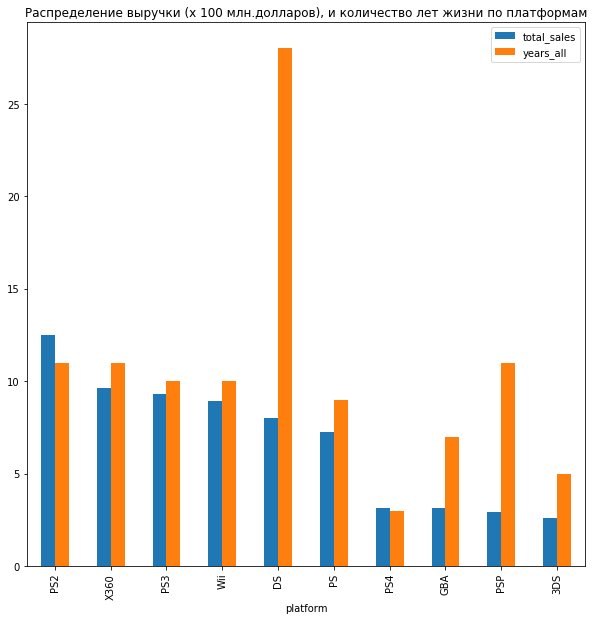

In [110]:
(data143
 .plot(x = 'platform'
       , y = ['total_sales', 'years_all']
       , figsize = (10,10)
       ,title = 'Распределение выручки (х 100 млн.долларов), и количество лет жизни по платформам'
       , kind = 'bar'
       )
)

Возьмём данные за соответствующий актуальный период.  
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.  
Основной фактор — эти данные помогут построить прогноз на 2017 год.  
Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.  
Велика ли разница в продажах?  
А в средних продажах на разных платформах?  
Опишите результат. 

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.  
Сформулируйте выводы.  
Соотнесите выводы с продажами игр на других платформах.

Посмотрите на общее распределение игр по жанрам.  
Что можно сказать о самых прибыльных жанрах?  
Выделяются ли жанры с высокими и низкими продажами?